# 第6章 机器学习1

在这一章中，我们将探讨以下主题
- 为建模准备数据
- 查找最近邻
- 用朴素贝叶斯分类文档
- 构建决策树解决多类问题

## 6.1 简介

分类算法的大致步骤如下。
1. 找到一个合适的算法。
2. 从训练集中学习一种模型，然后用测试集验证这个模型。
3. 应用这个模型来预测未知的实例或记录。

## 6.2 为建模准备数据

#### 6.2.1 准备工作

#### 6.2.2 操作方法

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_iris
import numpy as np

def get_iris_data():
    """
    Returns Iris dataset
    """
    # 加载iris数据集
    data = load_iris()
    
    # 抽取依赖变量和独立变量
    # y是类别标签
    # x是实例/记录
    x = data['data']
    y = data['target']
    
    # 为了方便起见，我们将其合并
    # 列合并
    input_dataset = np.column_stack([x,y])
    
    # 把数据搅乱
    # 我们希望在测试集和训练集中的记录随机分布
    np.random.shuffle(input_dataset)

    return input_dataset

In [5]:
# 我们采用 80/20 分布
# 80%的记录用来做训练
# 20%的剩余记录用来做测试
train_size = 0.8
test_size = 1 - train_size

# 获取数据
input_dataset = get_iris_data()

# 分割数据
train,test = train_test_split(input_dataset,test_size=test_size)

# 打印出原始数据集的大小
print("Dataset size ", input_dataset.shape)

# 打印出训练/测试集的大小
print("Train size", train.shape)
print("Test size", test.shape)

Dataset size  (150, 5)
Train size (120, 5)
Test size (30, 5)


In [6]:
def get_class_distribution(y):
    """
    Given an array of class labels
    Return the class distribution
    """
    distribution = {}
    set_y = set(y)
    for y_label in set_y:
        no_elements = len(np.where(y == y_label)[0])
        distribution[y_label] = no_elements
    dist_percentage = {class_label: count/(1.0*sum(distribution.values())) for class_label,count in distribution.items()}
    return dist_percentage

In [7]:
def print_class_label_split(train,test):
    """
    Print the class distribution
    in test and train dataset
    """
    y_train = train[:,-1]
    
    train_distribution = get_class_distribution(y_train)
    print("\nTrain data set class label distribution")
    print("=========================================\n")
    for k,v in train_distribution.items():
        print("Class label = %d, percentage records = %.2f"%(k,v))
        
    y_test = test[:,-1]
    
    test_distribution = get_class_distribution(y_test)
    
    print("\nTest data set class label distribution")
    print("========================================\n")
    for k,v in test_distribution.items():
        print("Class label = %d, percentage records = %.2f"%(k,v))

print_class_label_split(train,test)    


Train data set class label distribution

Class label = 0, percentage records = 0.33
Class label = 1, percentage records = 0.32
Class label = 2, percentage records = 0.35

Test data set class label distribution

Class label = 0, percentage records = 0.33
Class label = 1, percentage records = 0.40
Class label = 2, percentage records = 0.27


In [9]:
# 执行数据分割
from sklearn.cross_validation import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(input_dataset[:,-1],test_size=test_size,n_iter=1)

for train_indx,test_indx in stratified_split:
    train = input_dataset[train_indx]
    test = input_dataset[test_indx]
    
print_class_label_split(train,test)


Train data set class label distribution

Class label = 0, percentage records = 0.33
Class label = 1, percentage records = 0.33
Class label = 2, percentage records = 0.33

Test data set class label distribution

Class label = 0, percentage records = 0.33
Class label = 1, percentage records = 0.33
Class label = 2, percentage records = 0.33


#### 6.2.3 工作原理

#### 6.2.4 更多内容

## 6.3 查找最近邻

#### 6.3.1 准备工作

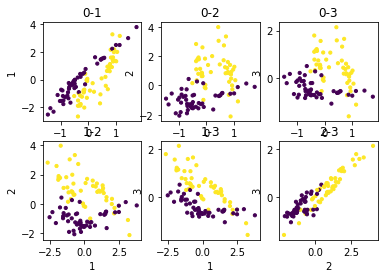

In [6]:
from sklearn.datasets import make_classification

import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

def get_data():
    """
    Make a sample classification dataset
    Returns : Independent varible y, dependent variable x
    """    
    x, y = make_classification(n_features=4)
    return x, y

def plot_data(x, y):
    """
    plot a scatter plot of all varible combinations
    """
    subplot_start = 231
    col_numbers = range(4)
    col_pairs = itertools.combinations(col_numbers,2)
    
    for col_pair in col_pairs:
        plt.subplot(subplot_start)
        plt.scatter(x[:,col_pair[0]], x[:,col_pair[1]], s=10, c=y)
        title_string = str(col_pair[0]) + "-" + str(col_pair[1])
        plt.title(title_string)
        x_label = str(col_pair[0])
        y_label = str(col_pair[1])
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        subplot_start += 1
        
    plt.show()
    
x, y = get_data()
plot_data(x, y)

#### 6.3.2 操作方法

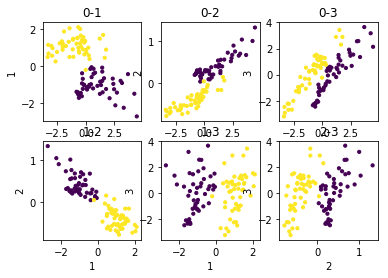

Model evaluation on training set
             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99        40
        1.0       1.00      0.97      0.99        40

avg / total       0.99      0.99      0.99        80


Model evaluation on test set
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        10
        1.0       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        20



In [9]:
from sklearn.cross_validation import  StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

def get_train_test(x, y):
    """
    Perpare a stratified train and test split
    """
    train_size = 0.8
    test_size = 1 - train_size
    input_dataset = np.column_stack([x,y])
    stratified_split = StratifiedShuffleSplit(input_dataset[:,-1],test_size=test_size,n_iter=1)
    
    for train_indx, test_indx in stratified_split:
        train_x = input_dataset[train_indx,:-1]
        train_y = input_dataset[train_indx,-1]
        test_x = input_dataset[test_indx,:-1]
        test_y = input_dataset[test_indx,-1]
    
    return train_x, train_y, test_x, test_y

def build_model(x, y, k=2):
    """
    Fit a nearest neighbour model
    """
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    return knn

def test_model(x, y, knn_model):
    y_predicted = knn_model.predict(x)
    print(classification_report(y,y_predicted))
        
# if __name__ = "__main__":
# 加载数据
x, y = get_data()
    
# 绘制数据的散点图
plot_data(x,y)
    
# 将数据分为训练集和测试集
train_x, train_y, test_x, test_y = get_train_test(x,y)
    
# 建模
knn_model = build_model(train_x,train_y)
    
# 测试模型
print("Model evaluation on training set")
print("================================")
test_model(train_x,train_y,knn_model)
    
print()
print("Model evaluation on test set")
print("================================")
test_model(test_x,test_y,knn_model)

#### 6.3.3 工作原理

In [1]:
pwd

'C:\\Users\\Administrator\\Documents\\Python\\Machine Learning\\Python数据科学指南'

## 6.4 用朴素贝叶斯分类文档

$$P(X|Y)=\frac{P(Y|X)*P(X)}{P(Y)}$$

#### 6.4.1 准备工作

#### 6.4.2 操作方法

#### 6.4.3 工作原理

In [39]:
from nltk.corpus import movie_reviews
from sklearn.cross_validation import StratifiedShuffleSplit
import nltk
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

get_data()函数，影评数据保存成正面和负面两类。第1层循环遍历这两类，在第2层循环中检索出分类的文件ID，再用文件ID检索出词。

In [49]:
def get_data():    
    """
    Get movies review data
    """    
    dataset = []
    y_labels = []
    
    # 抽取分类
    for cat in movie_reviews.categories():
        
        # 对于每个类别下的文件
        for fileid in movie_reviews.fileids(cat):
            
            # 获取术语这个分类的词语
            words = list(movie_reviews.words(fileid))
            dataset.append((words,cat))
            y_labels.append(cat)
            
    return dataset,y_labels

In [ ]:
将数据集分割成测试集和训练集。

In [41]:
def get_train_test(input_dataset,ylabels):
    """
    Perpare a stratified train and test split
    """
    train_size = 0.7
    test_size = 1 - train_size
    stratified_split = StratifiedShuffleSplit(ylabels,test_size=test_size,n_iter=1,random_state=77)
    
    for train_indx,test_indx in stratified_split:
        train = [input_dataset[i] for i in train_indx]
        train_y = [ylabels[i] for i in train_indx]
        
        test = [input_dataset[i] for i in test_indx]
        test_y = [ylabels[i] for i in test_indx]
    
    return train,test,train_y,test_y

In [42]:
def build_word_features(instance):
    """
    Build feature dictionary
    Features are binary, name of the feature is word itself and value is 1.
    Features are stored in a dictionary called feature_set
    """
    # 用字典来保存特征
    feature_set = {}
    
    # 词列表的实例元组里的第1个子项
    words = instance[0]
    
    # 把特征保存到字典中
    for word in words:
        feature_set[word] = 1
        
    # 实例元组里的第2个子项是类别标签
    return (feature_set, instance[1])   

In [43]:
def build_negate_features(instance):
    """
    If a word is preceeded by either 'not' or 'no' this function adds a prefix 'Not_' to that word
    It will also not insert the previous negation word 'not' or 'no' in feature dictionary
    """
    # 对单词进行检索，即实例元组中的第1个子项
    words = instance[0]
    final_words = []
    
    # 用一个布尔变量追踪上一个词是不是负面词
    negate = False
    
    # 生成负面词的列表
    negate_words = ['no', 'not']
    
    # 对词进行循环的时候，遇到一个负面词，负面标识变量值变为True
    # 否定词不会加入到特征字典中
    # 当负面标识变量值为True时，词的前面加上一个“Not_"前缀
    for word in words:
        if negate:
            word = 'Not_' + word
            negate = False
        if word not in negate_words:
            final_words.append(word)
        else:
            negate = True
            
    # 特征字典
    feature_set = {}
    for word in final_words:
        feature_set[word] = 1
    return (feature_set,instance[1])

In [50]:
def remove_stop_words(in_data):
    """
    Utility function to remove stop words from the given list of words
    """
    stopword_list = stopwords.words('english')
    negate_words = ['no', 'not']
    
    # 我们不希望删除负面词，我们建立一个新的停用词列表来排除负面词
    new_stopwords = [word for word in stopword_list if word not in negate_words]
    label = in_data[1]
    
    # 删除停用词
    words = [word for word in in_data[0] if word not in new_stopwords]
    
    return (words, label)

In [52]:
def build_keyphrase_features(instance):
    """
    A function to extract key phrases from the given text.
    Key Phrases are words of importance according to a measure
    In this key our phrase of is our length 2, i.e two words or bigrams
    """
    feature_set = {}
    instance = remove_stop_words(instance)
    words = instance[0]
    
    bigram_finder = BigramCollocationFinder.from_words(words)
    
    # 我们采用二元特征的原始频率记数
    # 例如：二元特征按出现的频率降序排列，选择前400个
    bigrams = bigram_finder.nbest(BigramAssocMeasures.raw_freq, 400)
    for bigram in bigrams:
        feature_set[bigram] = 1
    return (feature_set, instance[1])

In [44]:
def build_model(features):
    """
    Build a naive bayes model with the given feature set.
    """
    model = nltk.NaiveBayesClassifier.train(features)
    return model

In [45]:
def probe_model(model, features, dataset_type='Train'):
    """
    A utility function to check the goodness of our model.
    """
    accuracy = nltk.classify.accuracy(model, features)
    print(dataset_type, "Accuracy = %0.2f"%(accuracy * 100) + "%")

In [47]:
def show_features(model, no_features=5):
    """
    A utility function to see how important various features are for our model.
    """
    print("\nFeature Importance")
    print("===================\n")
    print(model.show_most_informative_features(no_features))

In [46]:
def build_model_cycle_1(train_data,dev_data):
    """
    First pass at trying out our model
    """
    # 为训练集建立特征
    train_features = map(build_word_features, train_data)
    
    # 为测试集建立特征
    dev_features = map(build_negate_features, dev_data)
    
    #建模
    model = build_model(train_features)
    
    # 模型预测
    probe_model(model, train_features)
    probe_model(model, dev_features, 'Dev')
    
    return model

In [55]:
def build_model_cycle_2(train_data,dev_data):
    """
    Second pass at trying out our model
    """
    # 为训练集建立特征
    train_features = map(build_negate_features, train_data)
    
    # 为测试集建立特征
    dev_features = map(build_negate_features, dev_data)
    
    # 建模
    model = build_model(train_features)
    
    # 模型探测
    probe_model(model, train_features)
    probe_model(model, dev_features, 'Dev')
    
    return model

In [53]:
def build_model_cycle_3(train_data, dev_data):
    """
    Third pass at trying out our model
    """
    # 为训练集建立特征
    train_features = map(build_keyphrase_features, train_data)
    
    # 为测试集建立特征
    dev_features = map(build_keyphrase_features, dev_data)
    
    # 建模
    model = build_model(train_features)
    
    # 模型探测
    probe_model(model, train_features)
    probe_model(model, dev_features, 'Dev') 
    test_features = map(build_keyphrase_features, test_data)
    probe_model(model, test_features, 'Test')
    
    return model

In [56]:
# 加载数据
input_dataset, y_labels = get_data()

# 训练数据
train_data, all_test_data, train_y, all_test_y = get_train_test(input_dataset, y_labels)

# Dev 数据
dev_data, test_data, dev_y, test_y = get_train_test(all_test_data, all_test_y)

# 查看不同数据集的大小
print("Original Data Size =", len(input_dataset))
print("Training Data Size =", len(train_data))
print("Dev Data Size =", len(dev_data))
print("Testing Data Size =", len(test_data))

# 建模的不同过程
model_cycle_1 = build_model_cycle_1(train_data, dev_data)

# 打印输出模型的信息
show_features(model_cycle_1)

model_cycle_2 = build_model_cycle_2(train_data, dev_data)
show_features(model_cycle_2)

model_cycle_3 = build_model_cycle_3(train_data, dev_data)
show_features(model_cycle_3)

Original Data Size = 2000
Training Data Size = 1399
Dev Data Size = 420
Testing Data Size = 181
Train Accuracy = 0.00%
Dev Accuracy = 0.00%

Feature Importance

Most Informative Features
               stupidity = 1                 neg : pos    =     15.6 : 1.0
                  warned = 1                 neg : pos    =     11.7 : 1.0
             wonderfully = 1                 pos : neg    =     11.5 : 1.0
             outstanding = 1                 pos : neg    =     11.0 : 1.0
            unconvincing = 1                 neg : pos    =     11.0 : 1.0
None
Train Accuracy = 0.00%
Dev Accuracy = 0.00%

Feature Importance

Most Informative Features
               stupidity = 1                 neg : pos    =     15.6 : 1.0
             wonderfully = 1                 pos : neg    =     14.7 : 1.0
               Not_funny = 1                 neg : pos    =     13.0 : 1.0
                  warned = 1                 neg : pos    =     11.7 : 1.0
             outstanding = 1              

## 6.5 构建决策树解决多类问题

In [1]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import StratifiedShuffleSplit
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pprint

In [2]:
def get_data():
    """
    Get Iris data
    """
    data = load_iris()
    x = data['data']
    y = data['target']
    label_names = data['target_names']
    return x,y,label_names.tolist()

def get_train_test(x,y):
    """
    Perpare a stratified train and test split
    """
    train_size = 0.8
    test_size = 1 - train_size
    input_dataset = np.column_stack([x,y])
    stratified_split = StratifiedShuffleSplit(input_dataset[:,-1],test_size=test_size,n_iter=1,random_state=77)
    
    for train_indx,test_indx in stratified_split:
        train_x = input_dataset[train_indx,:-1]
        train_y = input_dataset[train_indx,-1]
        test_x = input_dataset[test_indx,:-1]
        test_y = input_dataset[test_indx,-1]
    
    return train_x,train_y,test_x,test_y

def build_model(x,y):
    """
    Fit the model for the given attribute class label pairs
    """
    model = tree.DecisionTreeClassifier(criterion="entropy")
    model = model.fit(x,y)
    return model

def test_model(x,y,model,label_names):
    """
    Inspect the model for accuracy
    """
    y_predicted = model.predict(x)
    print("Model accuracy = %0.2f"%(accuracy_score(y,y_predicted) * 100) + "%\n")
    print("\nConfusion Matrix")
    print("=================")
    print(pprint.pprint(confusion_matrix(y,y_predicted)))
    print("\nClassification Report")
    print("=================")
    
    print(classification_report(y,y_predicted,target_names=label_names))

In [4]:
# 加载数据
x,y,label_names = get_data()

# 将数据分割为训练集和测试集
train_x,train_y,test_x,test_y = get_train_test(x,y)

# 建模
model = build_model(train_x,train_y)

# 在训练集上评估模型
test_model(train_x,train_y,model,label_names)

# 在测试集上评估模型
test_model(test_x,test_y,model,label_names)

Model accuracy = 100.00%


Confusion Matrix
array([[40,  0,  0],
       [ 0, 40,  0],
       [ 0,  0, 40]])
None

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        40
 versicolor       1.00      1.00      1.00        40
  virginica       1.00      1.00      1.00        40

avg / total       1.00      1.00      1.00       120

Model accuracy = 96.67%


Confusion Matrix
array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])
None

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.90      0.95        10
  virginica       0.91      1.00      0.95        10

avg / total       0.97      0.97      0.97        30

